# Fitting Models Exercise 2

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

<Container object of 3 artists>

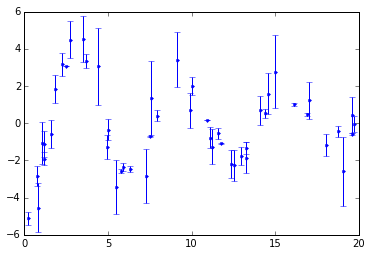

In [12]:
# YOUR CODE HERE
data = np.load("decay_osc.npz")
t = data["tdata"]
y = data["ydata"]
dy = data["dy"]

plt.errorbar(t, y, dy, fmt=".b")

In [ ]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

A =  -4.89598759534  +-  0.00371734185465
lambda =  0.09366414726  +-  7.69678908713e-06
omega =  -1.00111421585  +-  6.16411622718e-07
sigma =  0.0266129863316  +-  0.000188457359338


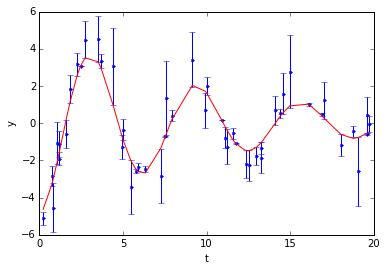

In [24]:
# YOUR CODE HERE
def model(t, A, lambd, omega, sigma):
    return A*np.exp(-lambd * t) * np.cos(omega*t) + sigma

theta_best, theta_cov = opt.curve_fit(model, t, y, sigma=dy)

print("A = ", theta_best[0], " +- ", theta_cov[0,0])
print("lambda = ", theta_best[1], " +- ", theta_cov[1,1])
print("omega = ", theta_best[2], " +- ", theta_cov[2,2])
print("sigma = ", theta_best[3], " +- ", theta_cov[3,3])

fitline = model(t, theta_best[0], theta_best[1], theta_best[2], theta_best[3])

plt.errorbar(t, y, dy, fmt=".b")
plt.plot(t, fitline, color="r")
plt.xlabel("t")
plt.ylabel("y")

In [22]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors